In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-08-05 13:05:57.370516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 13:05:57.495588: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-05 13:05:57.495603: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-05 13:05:58.119770: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

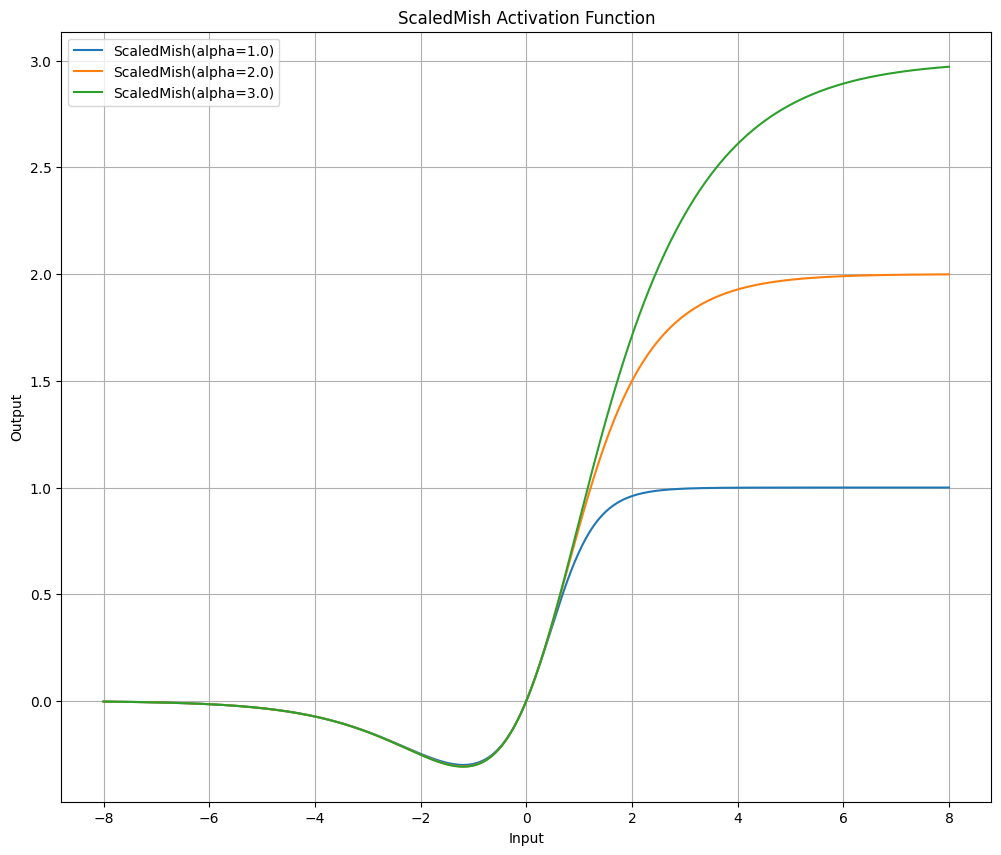

In [21]:
class ScaledMish(tf.keras.layers.Layer):
    def __init__(self, alpha=1.0, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha

    def call(self, inputs):
        mish_value = inputs * tf.math.tanh(tf.math.softplus(inputs))
        scaled_mish = self.alpha * tf.math.tanh(mish_value / self.alpha)
        return scaled_mish
    
# Generate input values from -2 to +2
x = np.linspace(-8, 8, 1000)
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)

# Compute the output of the ScaledMish activation function
y1 = ScaledMish(alpha=1.0)(x_tensor)
y2 = ScaledMish(alpha=2.0)(x_tensor)
y3 = ScaledMish(alpha=3.0)(x_tensor)


# Plot the function
plt.figure(figsize=(12, 10))
plt.plot(x, y1, label='ScaledMish(alpha=1.0)')
plt.plot(x, y2, label='ScaledMish(alpha=2.0)')
plt.plot(x, y3, label='ScaledMish(alpha=3.0)')

plt.title('ScaledMish Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

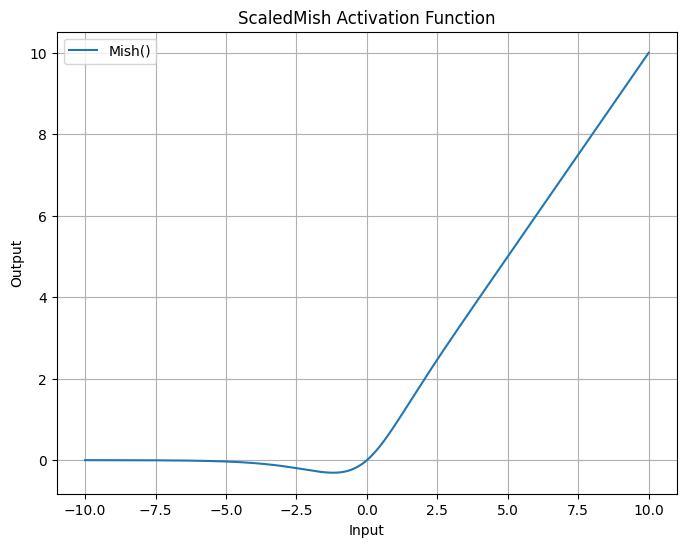

In [3]:
class Mish(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        mish_value = inputs * tf.math.tanh(tf.math.softplus(inputs))
        return mish_value

mish_layer = Mish()

# Generate input values from -2 to +2
x = np.linspace(-10, 10, 1000)
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)

# Compute the output of the ScaledMish activation function
y = mish_layer(x_tensor)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Mish()')
plt.title('ScaledMish Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()